## Session 8 HomeWork

In [1]:
# importing all the necessary libraries:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

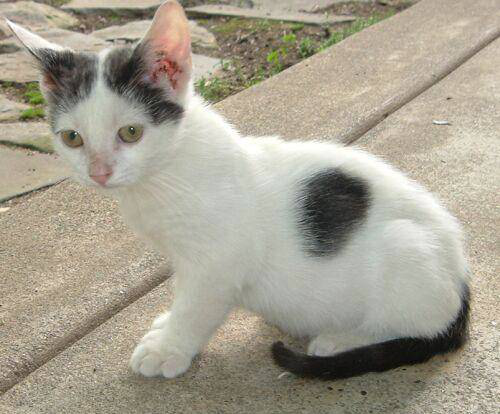

In [2]:
# library to load images from the dataset using Keras:
from tensorflow.keras.preprocessing.image import load_img

# loading the images from the dataset using Keras:
path = 'train/cats_train'  # path from Pluralsight-Python folder directory
name = 'cat.3.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [3]:
# Resizing the image by specifying the target size and storing it in a variable:
img = load_img(fullname, target_size=(150, 150))
print(img)

<PIL.Image.Image image mode=RGB size=150x150 at 0x130DAE77430>


In [4]:
# Converting the PIL image into a Numpy array:
np.array(img)

array([[[131, 123, 112],
        [133, 120, 111],
        [122, 108,  99],
        ...,
        [192, 179, 163],
        [196, 183, 167],
        [183, 170, 154]],

       [[181, 174, 158],
        [187, 178, 163],
        [201, 187, 174],
        ...,
        [196, 183, 167],
        [195, 182, 166],
        [184, 170, 159]],

       [[187, 179, 160],
        [192, 184, 165],
        [197, 186, 168],
        ...,
        [188, 175, 159],
        [191, 178, 162],
        [183, 169, 160]],

       ...,

       [[196, 184, 160],
        [179, 167, 145],
        [208, 195, 176],
        ...,
        [172, 166, 150],
        [147, 141, 125],
        [173, 167, 155]],

       [[166, 154, 130],
        [165, 153, 131],
        [188, 175, 156],
        ...,
        [203, 197, 181],
        [204, 198, 182],
        [225, 223, 200]],

       [[183, 171, 147],
        [213, 201, 179],
        [160, 147, 128],
        ...,
        [157, 151, 135],
        [168, 162, 146],
        [144, 143, 123]]

### Developing the model with following structure - 
(we'll train a much smaller model from scratch)

Each of the row in the Numpy array (150 X 150 X 3) above is a pixel from the image with RGB values as shown by the shape of the array below.

##### Model Condition 1 - The shape for input should be (150, 150, 3)

In [5]:
# getting the shape of the Numpy array:
x = np.array(img)
x.shape

(150, 150, 3)

#### Initializing CNN & adding a convolutional layer -

##### Model Condition 2 - Next, create a covolutional layer (Conv2D):

Use 32 filters

Kernel size should be (3, 3) (that's the size of the filter)

Use 'relu' as activation

In [6]:
# importing the necessary libraries:
from tensorflow.keras.layers import Input, Dense, Flatten,Conv2D
from tensorflow.keras.models import Sequential

In [7]:
# initiate sequential class to build various layers in sequence in CNN:
model=Sequential()

# adding the first convolutional layer:
model.add(Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(150,150,3)))

# Features which are used for classifying images using filter or feature detectors. Here we are using 32 features.
# Kernel_size refers to filter matrix size. Here we are using a 3*3 filter size.
# Since images are non-linear, to bring non-linearity, the relu (Rectified linear) activation function is applied.Relu function will output the input directly if it is positive, otherwise, it will output zero.
# input_shape - shows image size – 150*150*3. Since the images in RGB format so, the third dimension of the image is 3.

##### Model Condition 3 - Reduce the size of the feature map with max pooling (MaxPooling2D)

Set the pooling size to (2, 2)

In [8]:
from tensorflow.keras.layers import MaxPooling2D

model.add(MaxPooling2D(pool_size=2))

#### Flattening Operation - 

Flattening operation is converting the dataset into a 1-D array for input into the next layer which is the fully connected layer.

##### Model Condition 4 - Turn the multi-dimensional result into vectors using a Flatten layer

In [9]:
model.add(Flatten())

We have now flattened our output into a column, because we need to insert this 1-D data into an artificial neural network layer.

#### Fully Connected layer and output layer - 

The output of the flattening operation work as input for the neural network. Next we would be using a dense class from the Keras library from creating a fully connected layer and output layer.

##### Model Condition 5 - Next, add a Dense layer with 64 neurons and 'relu' activation

In [10]:
model.add(Dense(64,activation="relu"))

##### Model Condition 6 - Finally, create the Dense layer with 1 neuron - this will be the output

In [11]:
# activation for the binary classification - sigmoid activation:
model.add(Dense(1,activation="sigmoid"))

The sigmoid activation function is used for building the output layer as model is for binary classification.

### Training and Evaluating the Convolutional neural network - 

##### Model Condition 7 -  As optimizer use SGD with the following parameters: 

SGD(lr=0.002, momentum=0.8)

Compiling the CNN model:

In [12]:
# specifying the parameters for SGD optimizer:
optimizer = keras.optimizers.SGD(learning_rate=0.002,momentum=0.8)

# specifying the loss function for model:
loss = keras.losses.BinaryCrossentropy()  # the lower the number of losses the better

# compiling the model specifying accuracy as the metrics:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#### Question 1

Since we have a binary classification problem, what is the best loss function for us?

Note: since we specify an activation for the output layer, we don't need to set from_logits=True

**Ans.** **binary_crossentropy** is the preferred loss function for binary classification problems

#### Question 2

What's the total number of parameters of the model? You can use the summary method for that.

In [13]:
# Keras model summaries help provide a text-based overview of what model has been built:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

**Ans.** Total number of parameters = **11,215,873**

### Generators and Training - 

For the next two questions, use the following data generator for both train and validation:

**ImageDataGenerator(rescale=1./255)**

We don't need to do any additional pre-processing for the images.

When reading the data from train/val directories, check the class_mode parameter. Which value should it be for a binary classification problem?

Use batch_size=20

For training use .fit() with the following params:

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using training data subset and specifying parameters to ImageDataGenerator:
train_generator = ImageDataGenerator(rescale=1./255)

train_ds = train_generator.flow_from_directory('train', 
                                               batch_size=20,
                                              class_mode='binary',target_size=(150,150))  # "binary": 1D numpy array of binary labels

Found 20000 images belonging to 2 classes.


**class_mode parameter** for a binary classification problem should be **'binary'**

In [15]:
train_ds.class_indices

{'cats_train': 0, 'dogs_train': 1}

In [16]:
# Using validation data subset and specifying parameters to ImageDataGenerator: 
validation_generator = ImageDataGenerator(rescale=1./255)

val_ds = validation_generator.flow_from_directory('validation',
                                                  batch_size=20,
                                                 class_mode='binary',target_size=(150,150)) # "binary": 1D numpy array of binary labels

Found 5000 images belonging to 2 classes.


In [17]:
val_ds.class_indices

{'cats_val': 0, 'dogs_val': 1}

In [18]:
# training our model with specified paramters - 
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 115s 1s/step - loss: 0.7000 - accuracy: 0.4955 - val_loss: 0.6929 - val_accuracy: 0.5320
Epoch 2/10
100/100 [==============================] - 116s 1s/step - loss: 0.6930 - accuracy: 0.5170 - val_loss: 0.6928 - val_accuracy: 0.5190
Epoch 3/10
100/100 [==============================] - 88s 880ms/step - loss: 0.6933 - accuracy: 0.5045 - val_loss: 0.6933 - val_accuracy: 0.4770
Epoch 4/10
100/100 [==============================] - 81s 811ms/step - loss: 0.6930 - accuracy: 0.4990 - val_loss: 0.6923 - val_accuracy: 0.5470
Epoch 5/10
100/100 [==============================] - 79s 792ms/step - loss: 0.6919 - accuracy: 0.5310 - val_loss: 0.6913 - val_accuracy: 0.5250
Epoch 6/10
100/100 [==============================] - 69s 684ms/step - loss: 0.6900 - accuracy: 0.5370 - val_loss: 0.6879 - val_accuracy: 0.5720
Epoch 7/10
100/100 [==============================] - 76s 760ms/step - loss: 0.6879 - accuracy: 0.5320 - val_loss: 0.6857 - val_accura

#### Question 3

What is the median of training accuracy for this model?

In [59]:
import numpy as np

training_accuracy = history.history['accuracy']

print('Median:',round(np.median(training_accuracy),2))

Median: 0.58


#### Question 4

What is the standard deviation of training loss for this model?

In [46]:
training_loss = history.history['loss']

print('Std_Dev:',round(np.std(training_loss),2))

Std_Dev: 0.01


### Data Augmentation
For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using training data subset and specifying parameters to ImageDataGenerator for data augmentation:
train_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

train_ds = train_generator.flow_from_directory('train', 
                                               batch_size=20,
                                              class_mode='binary',target_size=(150,150))  # "binary": 1D numpy array of binary labels

Found 20000 images belonging to 2 classes.


In [54]:
# Using validation data subset and specifying parameters to ImageDataGenerator for data augmentation: 
validation_generator = ImageDataGenerator(rescale=1./255)

val_ds = validation_generator.flow_from_directory('validation',
                                                  batch_size=20,
                                                 class_mode='binary',target_size=(150,150)) # "binary": 1D numpy array of binary labels

Found 5000 images belonging to 2 classes.


#### Question 5

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

In [55]:
# training our model with data augmentations - 
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=20,            # adding 10 more epochs to make 20
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/20
100/100 [==============================] - 87s 863ms/step - loss: 0.6822 - accuracy: 0.5650 - val_loss: 0.6707 - val_accuracy: 0.6030
Epoch 2/20
100/100 [==============================] - 98s 980ms/step - loss: 0.6788 - accuracy: 0.5665 - val_loss: 0.6689 - val_accuracy: 0.5960
Epoch 3/20
100/100 [==============================] - 97s 967ms/step - loss: 0.6784 - accuracy: 0.5805 - val_loss: 0.6765 - val_accuracy: 0.5700
Epoch 4/20
100/100 [==============================] - 106s 1s/step - loss: 0.6804 - accuracy: 0.5665 - val_loss: 0.6641 - val_accuracy: 0.6110
Epoch 5/20
100/100 [==============================] - 90s 894ms/step - loss: 0.6798 - accuracy: 0.5595 - val_loss: 0.6715 - val_accuracy: 0.5810
Epoch 6/20
100/100 [==============================] - 97s 972ms/step - loss: 0.6722 - accuracy: 0.5705 - val_loss: 0.6567 - val_accuracy: 0.6140
Epoch 7/20
100/100 [==============================] - 89s 890ms/step - loss: 0.6704 - accuracy: 0.5770 - val_loss: 0.7001 - val_accu

What is the mean of validation loss for the model trained with augmentations?

In [56]:
validation_loss = history.history['val_loss']

print('Mean:',round(np.mean(validation_loss),2))

Mean: 0.66


#### Question 6: 

What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [58]:
val_accuracy_ep = history.history['val_accuracy'][-5:]  # selecting only last 5 epochs using slicing

print('Mean:',round(np.mean(val_accuracy_ep),2))

Mean: 0.61


## Session 9 HomeWork - 

### Serverless Deep Learning:

Using Model - dogs_cats_10_0.687.h5

In [47]:
import tensorflow as tf

from tensorflow import keras
import numpy as np

In [48]:
# reading the downloaded sample image of pants:
from tensorflow.keras.applications.xception import preprocess_input

# loading the model downloaded:
model = keras.models.load_model('dogs_cats_10_0.687.h5')
model

Now convert this model from Keras to TF-Lite format.

Use the TFLiteConverter to directly convert .h5 files to .tflite file.

In [49]:
# tensorflow lite already comes within tensorflow:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

# saving our converted model:
with open('dogs_cat_model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Riti\AppData\Local\Temp\tmp8ns82n3s\assets


INFO:tensorflow:Assets written to: C:\Users\Riti\AppData\Local\Temp\tmp8ns82n3s\assets


#### Question 1:

What's the size of the converted model?

Ans. **44.9 MB**

To be able to use this model, we need to know the index of the input and the index of the output.

In [50]:
import tensorflow.lite as tflite

interpreter = tflite.Interpreter(model_path='dogs_cat_model.tflite')

# putting the weights from the model to the interpreter in tflite:
interpreter.allocate_tensors()

# which part of the model is the input:
input_index = interpreter.get_input_details()[0]['index'] # where the input should go
input_index

0

In [51]:
interpreter.get_output_details()

# which part of the model is the output:
output_index = interpreter.get_output_details()[0]['index'] 
output_index

13

#### Question 2:

What's the output index for this model?

Ans. **13**

##### Preparing the image -

You'll need some code for downloading and resizing images. You can use below code. Let's download and resize this image.

Based on the solution of the previous homework, what should be the target size for the image?

**target_size=(150, 150)**

In [61]:
from PIL import Image
from urllib.request import urlopen
from io import BytesIO

In [62]:
def download_image(url):
    with urllib.request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img

def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [90]:
img = download_image('https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg')
img2 = prepare_image(img,(150,150))

Now we need to turn the image into an numpy array and pre-process it.

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#img = image.load_img(img, target_size=(150, 150))

x = image.img_to_array(img2)

In [92]:
# getting the shape of the Numpy array:
x = np.array(img2)
x.shape

(150, 150, 3)

In [208]:
from tensorflow.keras.applications.xception import preprocess_input

# creating an array with one image:
X = np.array([x])

# getting the shape of array:
X.shape

(1, 150, 150, 3)

In [209]:
# pre-processing the inputs to the model:
X = preprocess_input(X)

RGB_Channels = X[:,:,:,0]
R_channel = RGB_Channels[0]
print('first_pixel in R_channel:',R_channel[0][0])

first_pixel in R_channel: 0.41176474


#### Question 3:

After the pre-processing, what's the value in the first pixel, the R channel?

Ans. **0.41176474**

Now let's apply this model to this image. What's the output of the model?

In [232]:
# using the input_index and output_index - 
# Initialize input of the interpreter - using the input tensor 0 and setting it to our input image X:
interpreter.set_tensor(input_index, X)

# Invoking our model - passing through all the layers of neural network:
interpreter.invoke()

# Collecting our outputs/predictions - fetching the results of the model (NN) sitting in the output_index:
preds = interpreter.get_tensor(output_index)  # predictions from model

In [22]:
classes=['dogs','cats']

In [23]:
# joining the names of classes with our predictions using zip function:
dict(zip(classes,preds))

{'dogs': array([0.9703121], dtype=float32)}

##### Method 2 - Removing TF Dependancy

In [1]:
# importing tflite_runtime as standalone tflite package:
import tflite_runtime.interpreter as tflite

# For an xception model:
from keras_image_helper import create_preprocessor


interpreter = tflite.Interpreter(model_path='dogs_cat_model.tflite')

# putting the weights from the model to the interpreter in tflite:
interpreter.allocate_tensors()

# which part of the model is the input:
input_index = interpreter.get_input_details()[0]['index'] # where the input should go

# which part of the model is the output:
output_index = interpreter.get_output_details()[0]['index']


preprocessor = create_preprocessor('xception', target_size=(150, 150))

url = 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg'
X = preprocessor.from_url(url)
X.shape

(1, 150, 150, 3)

In [3]:
RGB_Channels = X[:,:,:,0]
R_channel = RGB_Channels[0]
print('first_pixel in R_channel:',R_channel[0][0])

first_pixel in R_channel: 0.41176474


In [21]:
# using the input_index and output_index - 
# Initialize input of the interpreter - using the input tensor 0 and setting it to our input image X:
interpreter.set_tensor(input_index, X)

# Invoking our model - passing through all the layers of neural network:
interpreter.invoke()

# Collecting our outputs/predictions - fetching the results of the model (NN) sitting in the output_index:
preds = interpreter.get_tensor(output_index)  # predictions from model
preds[0].tolist()

classes=['dogs','cats']

dict(zip(classes,preds[0].tolist()))

{'dogs': 0.9703121185302734}

#### Question 4:

What's the output of the model?

Ans. Prediction of the model - **0.9703121**

##### Prepepare the lambda code:

Now you need to copy all the code into a separate python file. You will need to use this file for the next two questions.
Cleaning the script and renaming it as - **lambda_function_dogs_cats.py**

Tip: you can test this file locally with ipython or Jupyter Notebook by importing the file and invoking the function from this file.
**import lambda_function_dogs_cats**

**lambda_function_dogs_cats.predict('https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg')**

It gives us output as **{'dogs': 0.9703121185302734}**

##### Docker:

For the next two questions, we'll use a Docker image that I already prepared. This is the Dockerfile that I used for creating the image and pushed it to agrigorev/zoomcamp-cats-dogs-lambda:v2

Pull already built Docker base image using command ----> docker pull agrigorev/zoomcamp-cats-dogs-lambda:v2

#### Question 5:

What's the image id of the base image?

Ans. **322fc756f258**

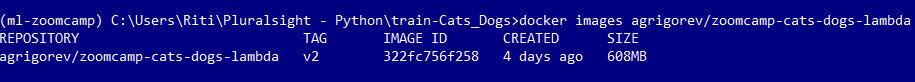

Predictions from our model for our sample image after adding lambda_handler.

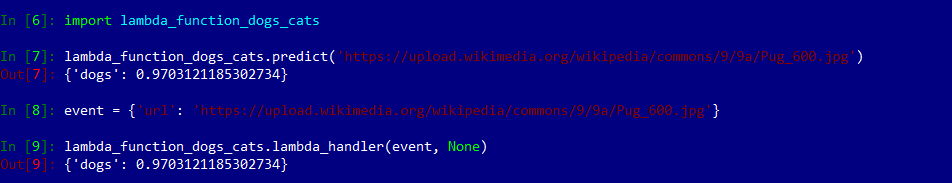

docker build -t agrigorev/zoomcamp-cats-dogs-lambda .

docker run -it --rm -p 8080:8080 agrigorev/zoomcamp-cats-dogs-lambda

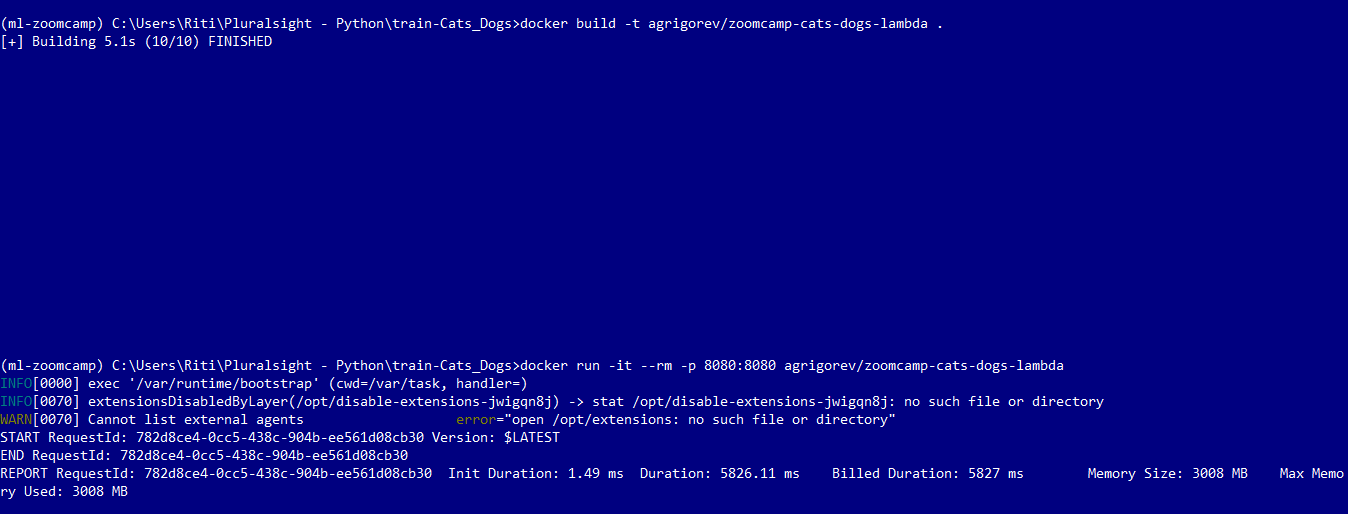

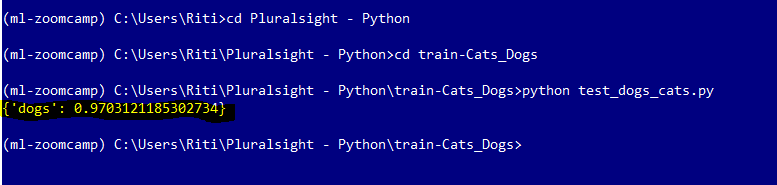

Snapshots of Files used - 

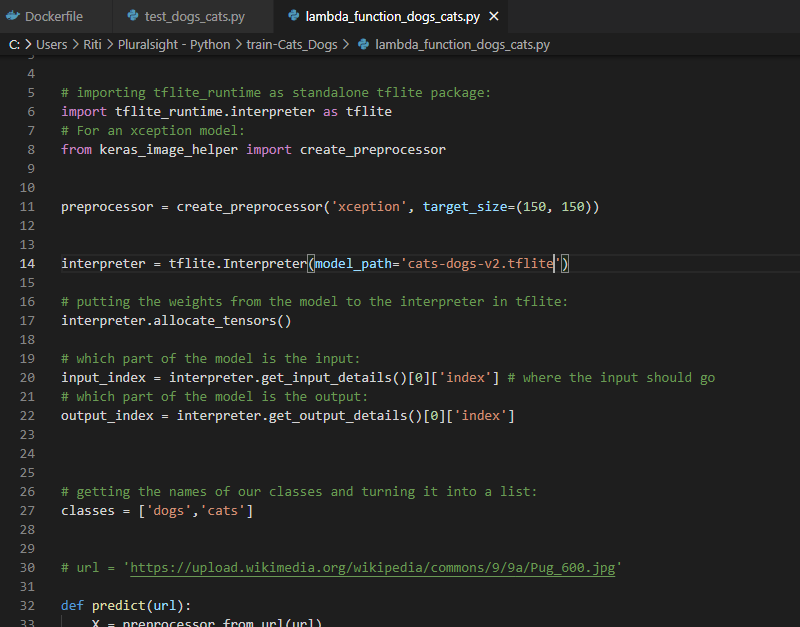

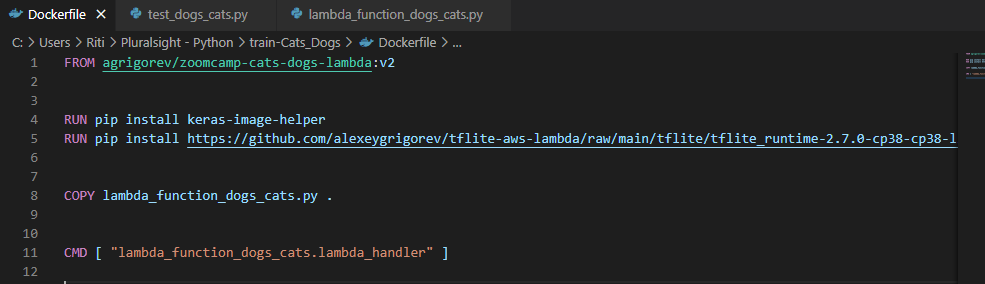

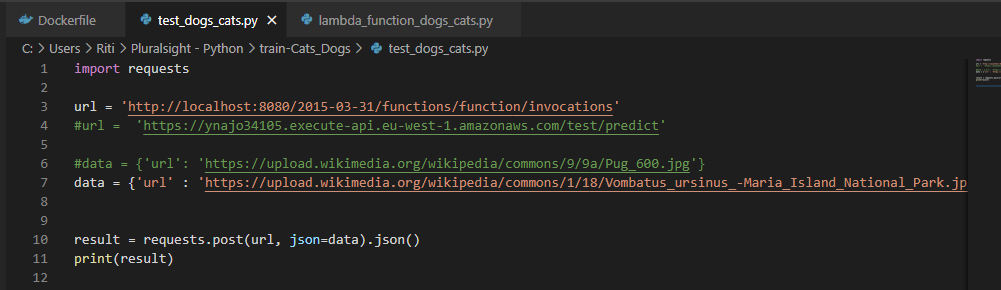

Commands run in Anacond cmd prompt -
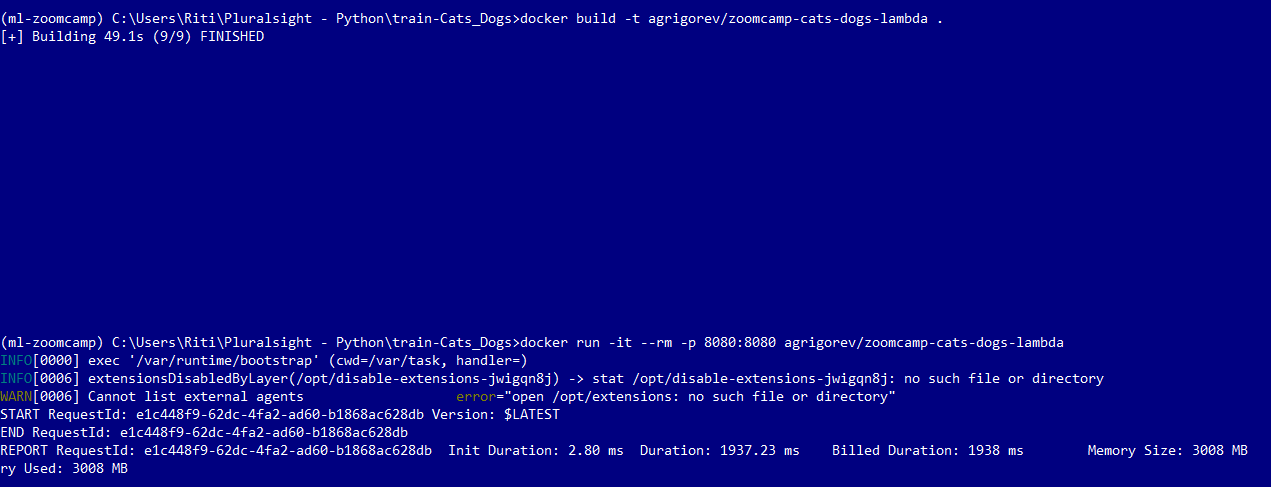

Snapshot of Prediction from Model - 
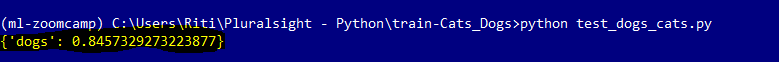

#### Question 6:

What's the output from the model?

Ans. **0.845**